In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split

In [2]:
# read in the datasets and concat together
df_1 = pd.read_csv('email_spam_dataset/lingSpam.csv', usecols=["Body", "Label"])
df_2 = pd.read_csv('email_spam_dataset/enronSpamSubset.csv', usecols=["Body", "Label"])
df_3 = pd.read_csv('email_spam_dataset/completeSpamAssassin.csv', usecols=["Body", "Label"])

In [3]:
df = pd.concat([df_1, df_2, df_3], ignore_index=True)
df = df.dropna()

# df.head()

In [4]:
# get rid of "Subject: " in front of every email
df["Body"] = [text[9:].lower() for text in df["Body"]]

# df.head()

In [5]:
# here is where we split from the SVM, we use count vectorization to get numerical features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

spamham_countVectorizer=vectorizer.fit_transform(df['Body'])

# using the counterVectorizer as the input
X = spamham_countVectorizer
y = df['Label']

In [6]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
from sklearn.naive_bayes import MultinomialNB

# using Multinomial Naive Bayes model
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [8]:
# Evaluating the model
from sklearn.metrics import classification_report

# running the model on test set
y_predict_test=NB_classifier.predict(X_test)


In [9]:
# print out the results using classification_report

print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2222
           1       0.95      0.93      0.94      1508

    accuracy                           0.95      3730
   macro avg       0.95      0.95      0.95      3730
weighted avg       0.95      0.95      0.95      3730



[Text(0, 0.5, 'Ham'), Text(0, 1.5, 'Spam')]

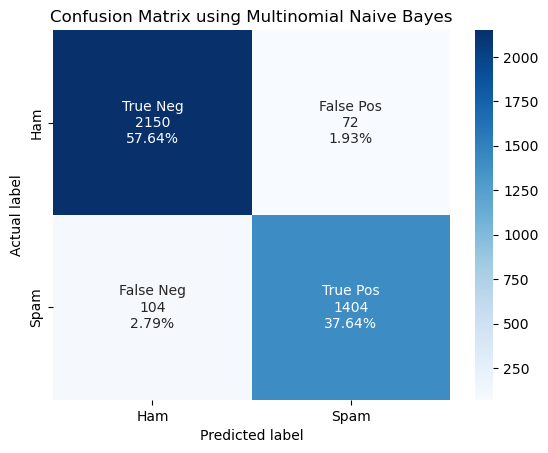

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_predict_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set(title="Confusion Matrix using Multinomial Naive Bayes")
# set x-axis label and ticks. 
ax.set_xlabel("Predicted label")
ax.xaxis.set_ticklabels(['Ham', 'Spam'])

# set y-axis label and ticks
ax.set_ylabel("Actual label")
ax.yaxis.set_ticklabels(['Ham', 'Spam'])

In [11]:
# from sklearn.naive_bayes import GaussianNB

# gnb = GaussianNB()

# gnb.fit(X_train.toarray(),y_train)

# # running the model on test set
# y_predict_test=gnb.predict(X_test)

# # print out the results using classification_report

# print(classification_report(y_test,y_predict_test))

In [12]:
from sklearn.naive_bayes import ComplementNB

complement_NB = ComplementNB()

complement_NB.fit(X_train,y_train)

# running the model on test set
y_predict_test=complement_NB.predict(X_test)

# print out the results using classification_report

print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2222
           1       0.95      0.93      0.94      1508

    accuracy                           0.95      3730
   macro avg       0.95      0.95      0.95      3730
weighted avg       0.95      0.95      0.95      3730



[Text(0, 0.5, 'Ham'), Text(0, 1.5, 'Spam')]

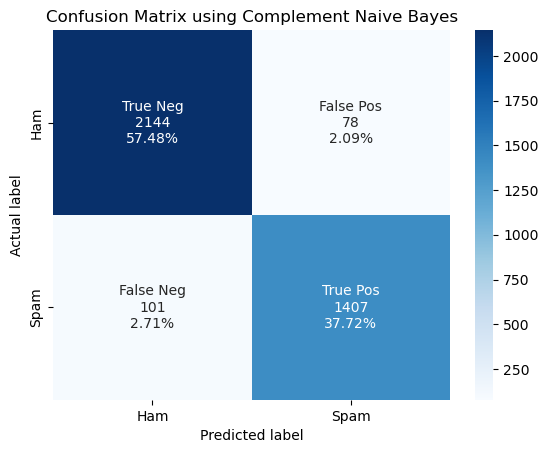

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_predict_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set(title="Confusion Matrix using Complement Naive Bayes")
# set x-axis label and ticks. 
ax.set_xlabel("Predicted label")
ax.xaxis.set_ticklabels(['Ham', 'Spam'])

# set y-axis label and ticks
ax.set_ylabel("Actual label")
ax.yaxis.set_ticklabels(['Ham', 'Spam'])

In [14]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()

BNB.fit(X_train,y_train)

# running the model on test set
y_predict_test=BNB.predict(X_test)

# print out the results using classification_report

print(classification_report(y_test,y_predict_test))

# differs from multinomial NB’s rule in that it explicitly penalizes the non-occurrence of
# of a feature i that is an indicator for class y, 
# where the multinomial variant would simply ignore a non-occurring feature.


              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2222
           1       0.86      0.98      0.92      1508

    accuracy                           0.93      3730
   macro avg       0.92      0.94      0.93      3730
weighted avg       0.93      0.93      0.93      3730



[Text(0, 0.5, 'Ham'), Text(0, 1.5, 'Spam')]

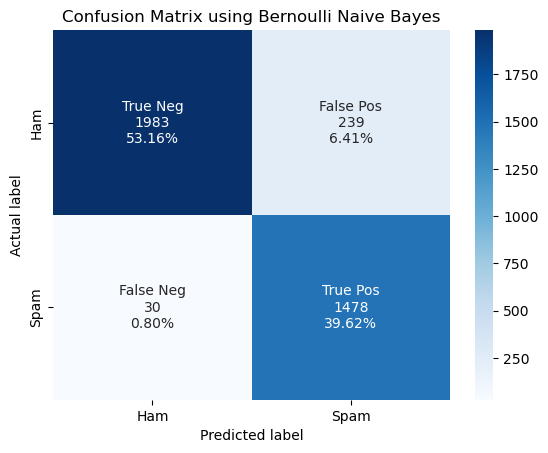

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_predict_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set(title="Confusion Matrix using Bernoulli Naive Bayes")
# set x-axis label and ticks. 
ax.set_xlabel("Predicted label")
ax.xaxis.set_ticklabels(['Ham', 'Spam'])

# set y-axis label and ticks
ax.set_ylabel("Actual label")
ax.yaxis.set_ticklabels(['Ham', 'Spam'])